In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_curve, auc, precision_recall_curve
%config IPCompleter.greedy=True

In [ ]:
# var 4

neg_m1 = 13
neg_m2 = 11
neg_std1 = math.sqrt(3)
neg_std2 = math.sqrt(3)
neg_n = 40

pos_m1 = 17
pos_m2 = 12
pos_std1 = math.sqrt(2)
pos_std2 = math.sqrt(2)
pos_n = 60

In [ ]:
neg_data = pd.DataFrame(data={'x1': np.random.normal(neg_m1, neg_std1, neg_n), 
                              'x2': np.random.normal(neg_m2, neg_std2, neg_n),
                              'y': np.full(neg_n, -1)}, 
                        index=range(1, neg_n + 1))

In [ ]:
neg_data.head()

,x1,x2,y
1,10.529391,9.604849,-1
2,12.333005,10.902194,-1
3,11.981173,9.295463,-1
4,13.147105,8.930013,-1
5,14.209284,9.463216,-1


In [ ]:
pos_data = pd.DataFrame(data={'x1': np.random.normal(pos_m1, pos_std1, pos_n), 
                              'x2': np.random.normal(pos_m2, pos_std2, pos_n), 
                              'y': np.ones(pos_n)}, 
                        index=range(neg_n + 1, neg_n + pos_n + 1))

In [ ]:
pos_data.head()

,x1,x2,y
41,16.366342,10.716481,1.0
42,16.932459,11.779188,1.0
43,18.639315,12.757209,1.0
44,18.846624,12.935136,1.0
45,15.836663,11.752813,1.0


In [ ]:
data = pd.concat([neg_data, pos_data])

In [ ]:
data

,x1,x2,y
1,10.529391,9.604849,-1.0
2,12.333005,10.902194,-1.0
3,11.981173,9.295463,-1.0
4,13.147105,8.930013,-1.0
5,14.209284,9.463216,-1.0
...,...,...,...
96,16.674169,11.196070,1.0
97,18.070070,11.975036,1.0
98,18.135352,11.187798,1.0
99,15.505987,14.247690,1.0


### Иллюстрация данных

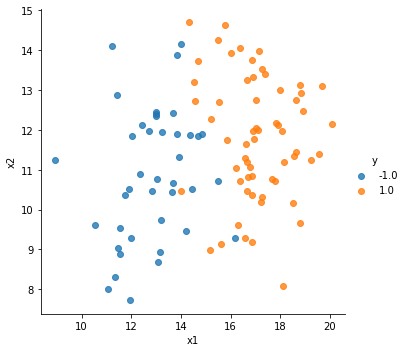

In [ ]:
sns.lmplot(x='x1', y='x2', data=data, hue='y', fit_reg=False)

### Построение классификатора

In [ ]:
gnb = GaussianNB()

In [ ]:
X = data.drop('y', axis=1)
y = data.y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = gnb.predict(X_test)
y_pred_proba = gnb.predict_proba(X_test)

In [ ]:
gnb.score(X_test, y_test)

0.88

In [ ]:
# sns.lmplot(x='x1', y='x2', data=X_train.assign(y=y_train), hue='y', fit_reg=False)

### Матрица ошибок

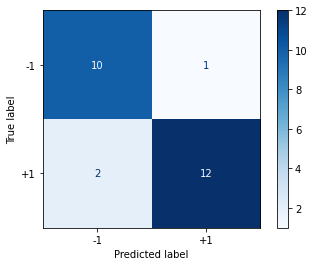

In [ ]:
plot_confusion_matrix(gnb, X_test, y_test, display_labels=['-1', '+1'], cmap=plt.cm.Blues)

### ROC-кривая

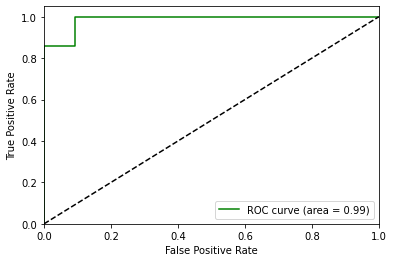

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='green',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

### PR-кривая

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() 
P = tp + fn
N = fp + tn

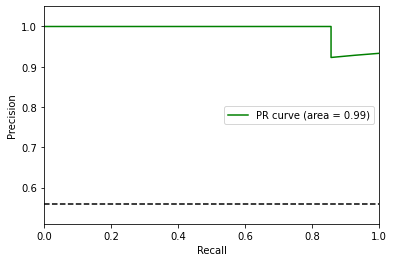

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(recall, precision, color='green', 
         label='PR curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [P / (P+N), P / (P+N)], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([P / (P+N) - 0.05, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="best")

In [ ]:
cross_val_score(gnb, X_train, y_train, cv=5)

array([1.        , 0.93333333, 0.93333333, 0.93333333, 0.93333333])